In [1]:
#The capital asset pricing model says that an asset's return should be based on three things
#Beta, the market return and the risk free rate
#It describes that more risk should equate to more return and only systematic risk matters
#Since you are supposed to diversify away idiosyncratic risk
#First, given the risk free rate and the market return, the market premium
Rf = .02
Rm = .08
print(Rm-Rf)

0.06


In [2]:
#A stock with 0 beta (no market risk) is expected to make just the risk free rate since there is no return for no risk
print(Rf+0*(Rm-Rf))

0.02


In [3]:
#From there, return goes up by Beta*Risk Premium
#A 1 beta stock will have an expected return equal to that of the market since it has the same risk
Beta = 1
Ri = Rf + Beta*(Rm-Rf)
print(Ri)

0.08


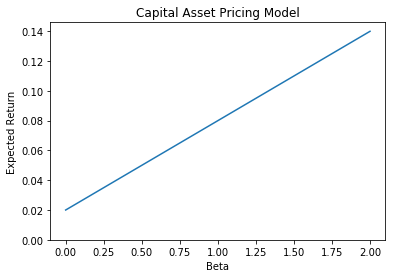

In [4]:
#This line can be plotted
import numpy as np
Betas = list(np.arange(0,2.1,.1))
def CAPM(Beta,Rf,Rm):
    return Rf + Beta*(Rm-Rf)
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

import matplotlib.pyplot as plt
plt.plot(Betas,expectedReturns)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.show()

In [5]:
#Let's compare the effects of different risk free and risk premium rates
def compareCAPM(rates1,rates2):
    Betas = list(np.arange(0,2.1,.1))
    expectedReturns1 = [CAPM(x,rates1[0],rates1[1]) for x in Betas]
    expectedReturns2 = [CAPM(x,rates2[0],rates2[1]) for x in Betas]
    
    label1 = "Rf = "+str(rates1[0]*100)+"%"+" Rm = "+str(rates1[1]*100)+"%"
    plt.plot(Betas,expectedReturns1,label=label1)
    label2 = "Rf = "+str(rates2[0]*100)+"%"+" Rm = "+str(rates2[1]*100)+"%"
    plt.plot(Betas,expectedReturns2,label=label2)
    
    plt.xlabel("Beta")
    plt.ylabel("Expected Return")
    plt.title("Capital Asset Pricing Model")
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    plt.legend()
    plt.show()

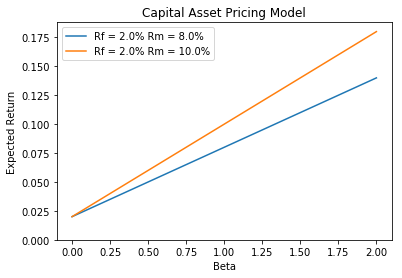

In [6]:
#Let's see how an increased market return changes the line
compareCAPM((.02,.08),(.02,.1))
#It increases the slop since the risk premium is now higher, the risk reward return is better for beta
#And this makes higher better stocks more attractive than before

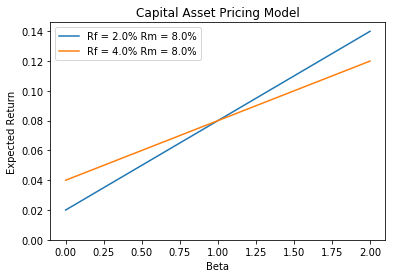

In [7]:
#What about the risk-free rate increasing witht the same market premium?
compareCAPM((.02,.08),(.04,.08))
#Now the start point of the line is higher, safer assets return more than before
#But also, the market premium has decreased thus making higher beta stocks less attractive
#All stocks with a beta<1 are more attractive than before, but now high beta stocks are much less attractive

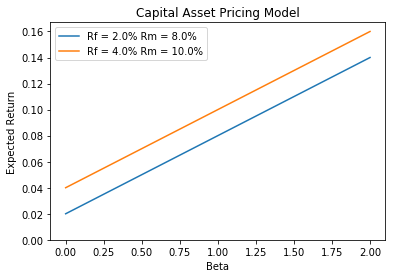

In [8]:
#What about both increasing by the same amount?
compareCAPM((.02,.08),(.04,.1))
#It is just a linear transformation since now the constant term of the risk-free is higher
#Market premium is the same as before so there is no change in slope

In [9]:
#What if we have a portfolio of stocks
#Let's say we have two stocks we are going to buy, one with a beta of 1.5 and one with .5 beta
#What are their expected returns
R1 = CAPM(1.5,.02,.08)
R2 = CAPM(.5,.02,.08)
print(R1)
print(R2)

0.11
0.05


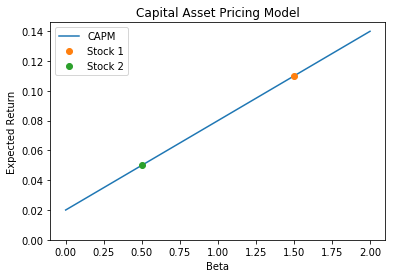

In [10]:
Betas = list(np.arange(0,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)

plt.plot(1.5,R1,"o",label="Stock 1")
plt.plot(.5,R2,"o",label="Stock 2")
plt.legend()

plt.show()

In [11]:
#When we combine portfolios, the portfolio Beta is the sum of the Betas and their weights
portfolioBeta = .5*1.5+.5*.5
print(portfolioBeta)
Rp = .5*R1+.5*R2
print(Rp)

1.0
0.08


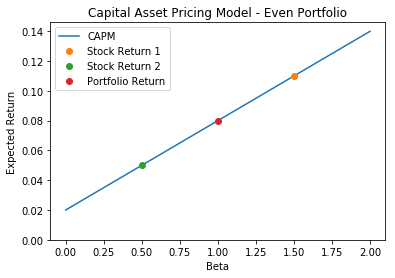

In [12]:
Betas = list(np.arange(0,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model - Even Portfolio")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)

plt.plot(1.5,R1,"o",label="Stock Return 1")
plt.plot(.5,R2,"o",label="Stock Return 2")
plt.plot(portfolioBeta,Rp,"o",label="Portfolio Return")
plt.legend()

plt.show()

In [13]:
#And also, if we know the portfolio beta, we can find its expected return another way, from the CAPM equation.
print(CAPM(portfolioBeta,.02,.08))

0.08


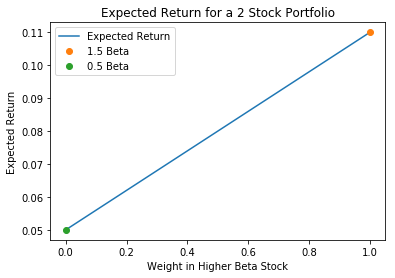

In [14]:
#When the weights between two stocks vary between 0 and 1, we see that our returns is a linear function
#And also is the same as the line between the two points
def portfolioReturn(w1,Beta1,Beta2,rf,rm):
    w2 = 1-w1
    portfolioBeta = w1*Beta1+w2*Beta2
    portfolioReturn = CAPM(portfolioBeta,rf,rm)
    return portfolioReturn

weights = np.arange(0,1.1,.1)
expectedReturns = [portfolioReturn(x,1.5,.5,.02,.08) for x in weights]

plt.plot(weights,expectedReturns,label="Expected Return")
plt.xlabel("Weight in Higher Beta Stock")
plt.ylabel("Expected Return")
plt.title("Expected Return for a 2 Stock Portfolio")

plt.plot(1,R1,"o",label="1.5 Beta")
plt.plot(0,R2,"o",label="0.5 Beta")
plt.legend()

plt.show()
#This is just a piece of that CAPM graph from above

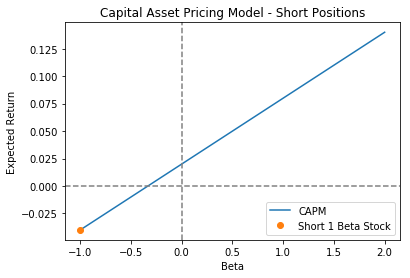

In [15]:
#These are long, or buying positions
#We can also have short positions which are selling positions we don't actually own (so a negative weight)
#When this happens we see beta flipping because our risk is reversed (markets going up now hurts us)
#Look at the difference between being long a 1 beta stock and short the same stock
Betas = list(np.arange(-1,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model - Short Positions")


plt.plot(-1,CAPM(-1,.02,.08),"o",label="Short 1 Beta Stock")
plt.legend()

plt.axhline(0, color='grey',linestyle="--")
plt.axvline(0, color='grey',linestyle="--")

plt.show()

In [16]:
#This isn't the entire picture though.... if we are shorting a stock we get the negative of its return
#So the two numbers would be
print("True Expected Returns")
print("Short Position:"+str(-CAPM(1,.02,.08)))
print()
print("CAPM Predicted Returns")
print("Short Position:"+str(CAPM(-1,.02,.08)))

True Expected Returns
Short Position:-0.08

CAPM Predicted Returns
Short Position:-0.039999999999999994


In [17]:
#When we short, we actually are given money and we have to buy and return the stock later
#So if we are starting with $100, when we short we receive $100, now we have $200
#With this $200, we can invest in the risk-free 

#In terms of dollars
initial = 100
#We have $200 now because we get $100 from shorting $100 worth of stock
cash = 100+100
print("Money to invest: "+str(cash))

Rs = -1*(CAPM(1,.02,.08))
stockInvestment = 100
print("The return of the stock: "+str(Rs*stockInvestment))

#We invest all $200 in the risk free asset
Rf = .02
rfInvestment = 200
print("The return of the risk free asset: "+str(Rf*rfInvestment))

#Put them together
print("The return of the two together: "+str(Rs*stockInvestment+Rf*rfInvestment))

#The percent return
print("The return of the two together: "+str((Rs*stockInvestment+Rf*rfInvestment)/initial))

Money to invest: 200
The return of the stock: -8.0
The return of the risk free asset: 4.0
The return of the two together: -4.0
The return of the two together: -0.04


In [18]:
#In terms of expected return 
#So if we have $100, that's a weight of 1, but we have $200 so we have a weight of 2 to invest in the risk-free asset
print(1*Rs+2*Rf)

-0.04


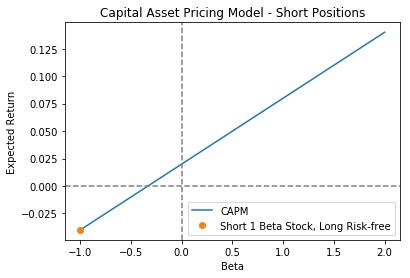

In [19]:
#So the true label should be short stock long risk free
Betas = list(np.arange(-1,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model - Short Positions")


plt.plot(-1,CAPM(-1,.02,.08),"o",label="Short 1 Beta Stock, Long Risk-free")
plt.legend()

plt.axhline(0, color='grey',linestyle="--")
plt.axvline(0, color='grey',linestyle="--")

plt.show()

In [20]:
#We could also go long and short in the same security plus long in the risk-free to get 0 beta
initial = 100
#We have $200 now because we get $100 from shorting $100 worth of stock
cash = 100+100
print("Money to invest: "+str(cash))

#Short the stock with $100
Rshort = -1*(CAPM(1,.02,.08))
shortInvestment = 100
print("The return of the short: "+str(Rshort*shortInvestment))

#We invest $100 in the risk free asset
Rf = .02
rfInvestment = 100
print("The return of the risk free asset: "+str(Rf*rfInvestment))

#We invest $100 in the stock long
Rlong = 1*(CAPM(1,.02,.08))
longInvestment = 100
print("The return of the long: "+str(Rlong*longInvestment))

#Put them together
print("The return of them together: "+str(Rshort*shortInvestment+Rf*rfInvestment+Rlong*longInvestment))

#The percent return
print("The return of them together: "+str((Rshort*shortInvestment+Rf*rfInvestment+Rlong*longInvestment)/initial))

Money to invest: 200
The return of the short: -8.0
The return of the risk free asset: 2.0
The return of the long: 8.0
The return of them together: 2.0
The return of them together: 0.02


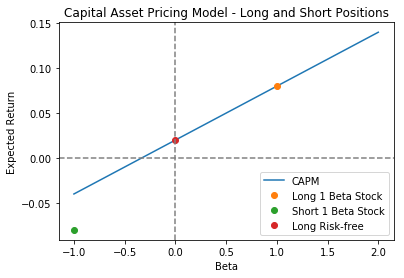

In [21]:
#Combined together, this is what our return
Betas = list(np.arange(-1,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model - Long and Short Positions")


plt.plot(1,CAPM(1,.02,.08),"o",label="Long 1 Beta Stock")
plt.plot(-1,-CAPM(1,.02,.08),"o",label="Short 1 Beta Stock")
plt.plot(0,.02,"o",label="Long Risk-free")
plt.legend()

plt.axhline(0, color='grey',linestyle="--")
plt.axvline(0, color='grey',linestyle="--")

plt.show()

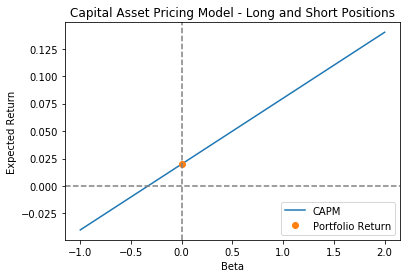

In [22]:
#Combined together, this is what our return
Betas = list(np.arange(-1,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model - Long and Short Positions")


plt.plot(0,CAPM(1,.02,.08)-CAPM(1,.02,.08)+.02,"o",label="Portfolio Return")
plt.legend()

plt.axhline(0, color='grey',linestyle="--")
plt.axvline(0, color='grey',linestyle="--")

plt.show()

In [23]:
#Shorting stocks can also be used for hedging, or bringing down the beta
#First, let's see how we could get a beta of 1 for our portfolio with only long positions
#in a .5 and 1.5 beta stock
betaPortfolio = .5*.5+1.5*.5
returnPortfolio = .5*CAPM(.5,.02,.08)+.5*CAPM(1.5,.02,.08)
print(betaPortfolio)
print(returnPortfolio)

1.0
0.08


In [24]:
#With shorting, let's say 100% long in 1.5 beta, 100% short in .5 beta, and 100% of the 
#money from the short in the risk free
betaPortfolio = -1*.5+1*1.5+1*0
returnPortfolio = -1*CAPM(.5,.02,.08)+1*CAPM(1.5,.02,.08)+.02
print(betaPortfolio)
print(returnPortfolio)

1.0
0.08


In [25]:
#Now, let's get really creative with it and go short in the .5 beta, but use the money from the short to
#go double long in the 1.5 beta stock
betaPortfolio = -1*.5+2*1.5
returnPortfolio = -1*CAPM(.5,.02,.08)+2*CAPM(1.5,.02,.08)
print(betaPortfolio)
print(returnPortfolio)

2.5
0.16999999999999998


In [26]:
#Which matches a 2.5 beta stock
print(CAPM(2.5,.02,.08))

0.16999999999999998


In [27]:
#Now, here's the risk, these are expected returns. What if an idiosyncratic risk hits the long position
#And returns are halved for that quarter?
print("Long: "+str(200*CAPM(1.5,.02,.08)/2))
print("Short: "+str(-100*CAPM(.5,.02,.08)))
print()
print("Total: "+str(200*CAPM(1.5,.02,.08)/2+-100*CAPM(.5,.02,.08)))
print("Total Return: "+str((200*CAPM(1.5,.02,.08)/2+-100*CAPM(.5,.02,.08))/100))

Long: 11.0
Short: -5.0

Total: 6.0
Total Return: 0.06


In [28]:
#Or what if they had 0 return?
#The short position could also post larger returns making us lose more money
print("Long: "+str(0))
print("Short: "+str(-100*CAPM(.5,.02,.08)))
print()
print("Total: "+str(-100*CAPM(.5,.02,.08)))
print("Total Return: "+str(-100*CAPM(.5,.02,.08)/100))

Long: 0
Short: -5.0

Total: -5.0
Total Return: -0.05


In [29]:
returnStock = CAPM(1,.02,.08)
rf = .02
print(returnStock*2-rf)
print(CAPM(2,.02,.08))

0.14
0.13999999999999999


In [30]:
#Alpha is the term for deviations from CAPM
#In reality CAPM is not at all a perfect measure, but for now we will make that assumption
#So let's say we have a 1 Beta stock when the risk-free is 2% and the market return is 8%
#What should it's expected return be?
Ri = .02+1*(.08-.02)
print(Ri)

0.08


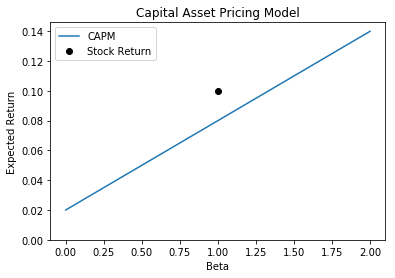

In [31]:
#What if the expected return in the market is actually 10%, let's graph that first
Betas = list(np.arange(0,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)

plt.plot(1,.1,"ko",label="Stock Return")
plt.legend()

plt.show()

In [32]:
#Look at that dot, it's above the line. The expected return is greater than CAPM predicts, alpha is this extra term
#It has 2% excess return not accounted for by risk
alpha = .1 - CAPM(1,.02,.08)
print(alpha)

0.020000000000000004


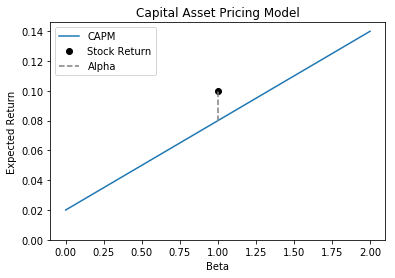

In [33]:
#Alpha is the vertical distance between the CAPM line and the stock's position in the graph
plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)

plt.plot(1,.1,"ko",label="Stock Return")
plt.plot([1,1],[.08,.1],linestyle="--",color="grey",label="Alpha")
plt.legend()

plt.show()

In [34]:
#We can profit from this by investing in it, but we could also profit even more through arbitrage
#We could short the S&P 500 and go long in this stock plus 2% in the risk-free rate
#The beta of the market with the market is 1 intuitively
stockReturn = .1
marketReturn = .08
Beta = 1
weightStock = 1
weightMarket = -1
portfolioBeta = Beta*weightStock+1*weightMarket
print(portfolioBeta)
portfolioReturn = stockReturn*weightStock+marketReturn*weightMarket+.02
print(portfolioReturn)
#We have no market risk but we have 4% return, instead of 2% return

0
0.04000000000000001


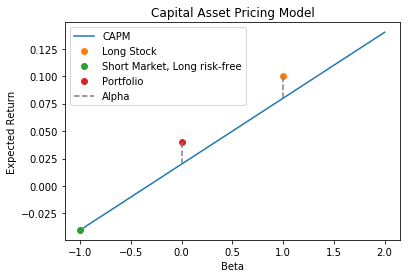

In [35]:
#Alpha is the vertical distance between the CAPM line and the stock's position in the graph
Betas = list(np.arange(-1,2.1,.1))
expectedReturns = [CAPM(x,.02,.08) for x in Betas]

plt.plot(Betas,expectedReturns,label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")

plt.plot(1,.1,"o",label="Long Stock")
plt.plot(-1,CAPM(-1,.02,.08),"o",label="Short Market, Long risk-free")
plt.plot(portfolioBeta,portfolioReturn,"o",label="Portfolio")

plt.plot([1,1],[.08,.1],linestyle="--",color="grey",label="Alpha")
plt.plot([0,0],[.02,.04],linestyle="--",color="grey")
plt.legend()

plt.show()